In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

In [602]:
df=pd.read_csv("epi_r.csv")
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [412]:
df.tail()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,Baked Ham with Marmalade-Horseradish Glaze,4.375,560.0,73.0,10.0,3698.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [414]:
# describing the rating feature 

df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [415]:
df.calories.describe()

count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64

In [416]:
#df= df[(df["protein"]!=0.0) & (df["fat"]!=0.0) & (df["sodium"]!=0.0)]

In [417]:
df.calories.isnull().sum()

4117

In [418]:
#df.reset_index(drop=True)

In [419]:
#df[df['calories'].isnull()==1]

In [420]:
df=df[(df['calories']<10000) | (df['calories'].isnull()==1)]

In [421]:
#print(df.calories.values)

In [422]:
#cals=[]
#for row in df.calories.values:
    #if(math.isnan(row)):
       # cals.append(row)
    #else:
        #if(row<=10000):
            #cals.append(row)

In [423]:
#df2=pd.DataFrame(cals)

In [424]:
#df2.columns=["calories2"]

In [425]:
#df2.head()

In [426]:
#df2.calories2.describe()

In [427]:
#df_zero=df[df["calories"]==0]
#df_zero.calories.describe()

In [428]:
cal_mean=df.calories.mean()
print(cal_mean)

487.9006535126304


In [429]:
df.calories.isnull().sum()

4117

In [430]:
df.calories.fillna(cal_mean,inplace = True)

In [431]:
df= df[(df["protein"]!=0.0) & (df["fat"]!=0.0) & (df["sodium"]!=0.0)]

In [432]:
df.calories.describe()

count    18498.000000
mean       514.879824
std        548.773391
min         12.000000
25%        257.000000
50%        487.900654
75%        527.000000
max       9831.000000
Name: calories, dtype: float64

In [433]:
#from impyute.imputation.cs import mice

In [434]:
#X = df.drop('title', axis=1)

#imputed = mice(X.values)
#mice_calories = imputed[:, 1]
#mice_calories = [0 if cal < 0 else cal for cal in mice_calories]

In [435]:
# describing the calories feature

#df=df[df["calories"]<=1000]
#df=df[df["calories"]!=0]
#df.dropna(axis=0, subset=['calories'], inplace = True)
#df.calories.describe()


In [436]:
#no values are 0 in calories column

In [437]:
df.calories.max()

9831.0

In [438]:
#X = df.iloc[:,1:]

#imputer = IterativeImputer(BayesianRidge())
#impute_data = pd.DataFrame(imputer.fit_transform(X))

In [439]:
#cal_mean=df.calories.mean()

In [440]:
#df.calories.fillna(cal_mean)

In [441]:
import seaborn as sns

In [442]:
#sns.scatterplot(data=df['rating'])

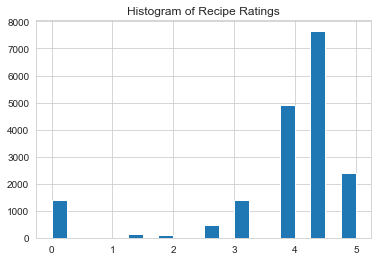

In [443]:
df.rating.hist(bins = 20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [444]:
sns.set_style("whitegrid")

<AxesSubplot:>

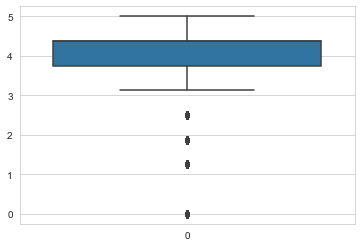

In [445]:
sns.boxplot(data = df["rating"])

In [446]:
df.rating.isnull().sum()

0

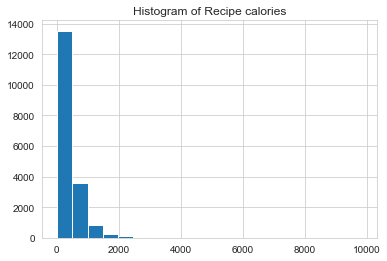

In [447]:

df.calories.hist(bins = 20 )
plt.title('Histogram of Recipe calories')
plt.show()

<AxesSubplot:>

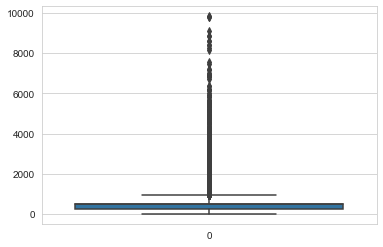

In [448]:
sns.set_style("whitegrid")
sns.boxplot(data = df["calories"])

In [449]:
#df=df[df["rating"]>=3]

In [450]:
#print(df)

In [451]:
df.sample()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
15982,Coconut-Macaroon and Lemon Ice Cream Sandwiches,3.75,335.0,4.0,18.0,134.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Density'>

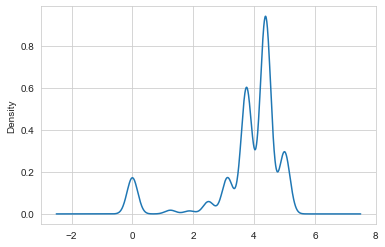

In [452]:
df['rating'].plot.kde()

<AxesSubplot:ylabel='Density'>

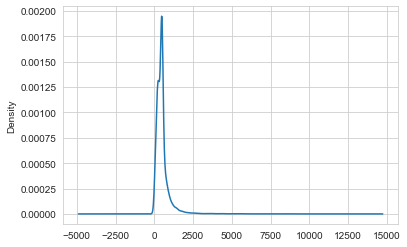

In [453]:

df['calories'].plot.kde()

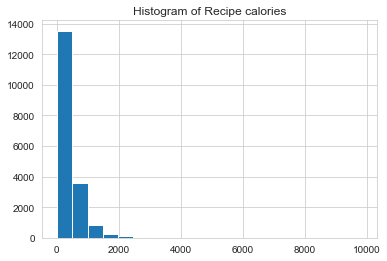

In [454]:
df.calories.hist(bins = 20)
plt.title('Histogram of Recipe calories')
plt.show()

<AxesSubplot:ylabel='calories'>

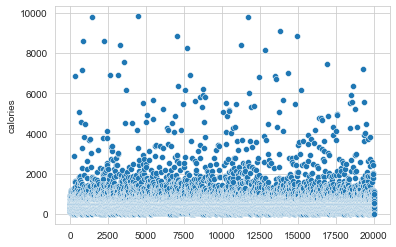

In [455]:
sns.scatterplot(data=df['calories'])

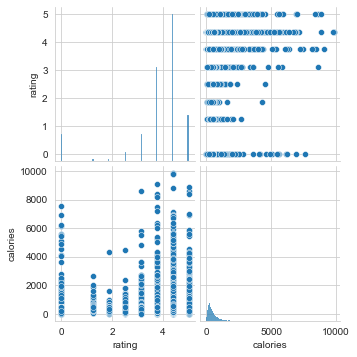

In [456]:
sns.pairplot(data=df.iloc[:,1:3])

In [457]:
#sns.heatmap(data=df.iloc[:,1:3])

In [458]:
#df= df[(df["protein"]!=0.0) & (df["fat"]!=0.0) & (df["sodium"]!=0.0)]

In [459]:
print(df)

                                             title  rating    calories  \
0                  Lentil, Apple, and Turkey Wrap    2.500  426.000000   
1      Boudin Blanc Terrine with Red Onion Confit    4.375  403.000000   
2                    Potato and Fennel Soup Hodge    3.750  165.000000   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000  487.900654   
4                        Spinach Noodle Casserole    3.125  547.000000   
...                                            ...     ...         ...   
20047                              Parmesan Puffs    3.125   28.000000   
20048              Artichoke and Parmesan Risotto    4.375  671.000000   
20049                       Turkey Cream Puff Pie    4.375  563.000000   
20050     Snapper on Angel Hair with Citrus Cream    4.375  631.000000   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375  560.000000   

       protein   fat  sodium  #cakeweek  #wasteless  22-minute meals  \
0         30.0   7.0   559.0        0.0

In [460]:
c=0;
for col in df.iloc[:,6:].columns:
    
    if len(df[df[col]==1])<10:
        df = df.drop(columns=col)
        print(col)
        c=c+1
    
print(" No of columns to drop : ",c)
    
    
    

#cakeweek
#wasteless
30 days of groceries
alabama
alaska
anthony bourdain
aperitif
apple juice
arizona
aspen
atlanta
australia
beverly hills
biscuit
boston
bran
brooklyn
brownie
buffalo
bulgaria
burrito
cambridge
campari
camping
canada
caviar
chambord
chartreuse
chicago
chili
cobbler/crumble
columbus
cook like a diner
cookbook critic
costa mesa
cranberry sauce
crêpe
cr��me de cacao
cuba
cupcake
custard
dallas
denver
digestif
dominican republic
dorie greenspan
drinks
eau de vie
egg nog
egypt
emeril lagasse
england
entertaining
epi + ushg
epi loves the microwave
flat bread
frankenrecipe
freezer food
friendsgiving
frittata
fritter
germany
grains
grand marnier
granola
grappa
guam
haiti
hamburger
hawaii
healdsburg
hollywood
house cocktail
houston
hummus
iced coffee
iced tea
idaho
illinois
indiana
iowa
israel
italy
jamaica
japan
juicer
kansas
kansas city
kentucky
kitchen olympics
labor day
lancaster
las vegas
lasagna
lingonberry
london
long beach
louisiana
louisville
low sugar
lychee
macaron

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18498 entries, 0 to 20051
Columns: 501 entries, title to turkey
dtypes: float64(500), object(1)
memory usage: 71.5+ MB


In [462]:
df.head()

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,487.900654,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [463]:
#X=df['rating']

In [464]:
corr_matrix = df.iloc[:,1:6].corr().abs()

In [465]:
print(corr_matrix)

            rating  calories   protein       fat    sodium
rating    1.000000  0.050361  0.063540  0.061199  0.015878
calories  0.050361  1.000000  0.683439  0.906235  0.225605
protein   0.063540  0.683439  1.000000  0.528804  0.350408
fat       0.061199  0.906235  0.528804  1.000000  0.140986
sodium    0.015878  0.225605  0.350408  0.140986  1.000000


In [466]:
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [467]:
#to_drop = [column for column in df.iloc[:,1:6].columns if any(df[column] > 0.70)]
#print('Columns to drop: ' , (len(to_drop)))

In [468]:
R=df['rating'].values

In [469]:
print(R)

[2.5   4.375 3.75  ... 4.375 4.375 4.375]


In [470]:
#Shapiro-Wilk Test

In [471]:
from scipy.stats import shapiro

In [472]:
stat, p = shapiro(R)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.699, p=0.000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [473]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian ')
else:
    print('Sample does not look Gaussian ')

Sample does not look Gaussian 


In [474]:
#D’Agostino’s K^2 test

In [475]:
from scipy.stats import normaltest

In [476]:
stat, p = normaltest(R)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=7088.351, p=0.000


In [477]:
#Anderson-Darling Test

In [478]:
from scipy.stats import anderson

In [479]:
result = anderson(R)
print('Statistic: %.3f' % result.statistic)

Statistic: 1972.684


In [480]:
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal ' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal ' % (sl, cv))

15.000: 0.576, data does not look normal 
10.000: 0.656, data does not look normal 
5.000: 0.787, data does not look normal 
2.500: 0.918, data does not look normal 
1.000: 1.092, data does not look normal 


In [481]:
#Testing if calories is normally distributed 

In [482]:
C=df['calories'].values

In [483]:
#D’Agostino’s K^2 test

In [484]:
stat, p = normaltest(C)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=22808.221, p=0.000


In [485]:
#Shapiro-Wilk Test

In [486]:
stat, p = shapiro(C)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.520, p=0.000


In [487]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian ')

Sample does not look Gaussian 


In [488]:
#Testing if protein is normally distributed 

In [489]:
df.protein.describe()

count    14346.000000
mean        23.446396
std         44.204352
min          1.000000
25%          4.000000
50%         10.000000
75%         30.000000
max       1625.000000
Name: protein, dtype: float64

In [490]:
df.fat.describe()

count    14345.000000
mean        30.412618
std         43.601224
min          1.000000
25%         10.000000
50%         19.000000
75%         36.000000
max        923.000000
Name: fat, dtype: float64

In [491]:
df.fat.isnull().sum()

4153

In [492]:
df.protein.isnull().sum()

4152

In [493]:
df.sodium.isnull().sum()

4117

In [494]:
protein_mean=df.protein.mean()

print(protein_mean)

23.44639620800223


In [495]:
df.protein.fillna(protein_mean,inplace = True)

In [496]:
df.fat.fillna(df.fat.mean(),inplace = True)

In [497]:
df.sodium.fillna(df.sodium.mean(),inplace = True)

In [498]:
P=df['protein'].values

In [499]:
#Shapiro-Wilk Test

In [500]:
stat, p = shapiro(P)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.414, p=0.000


In [501]:
#D’Agostino’s K^2 test

In [502]:
stat, p = normaltest(P)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=33550.578, p=0.000


In [503]:

#  Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df.calories.values
data2 = df.protein.values
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.752, p=0.000
Probably dependent


In [504]:

#  Mann-Whitney U Test
#from scipy.stats import mannwhitneyu
#data1 = df.calories.values
#data2 = df.protein.values
#stat, p = mannwhitneyu(data1, data2)
#print('stat=%.3f, p=%.3f' % (stat, p))
#if p > 0.05:
#	print('Probably the same distribution')
#else:
#	print('Probably different distributions')


<AxesSubplot:xlabel='calories', ylabel='protein'>

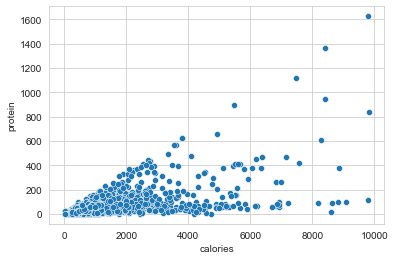

In [505]:
sns.scatterplot(data=df, x="calories", y="protein")

In [506]:
from scipy.stats import pearsonr

In [507]:
X=df['calories'].values
Y=df['protein'].values
pearsonr(X,Y)
    

(0.6828918924101348, 0.0)

<AxesSubplot:xlabel='calories', ylabel='fat'>

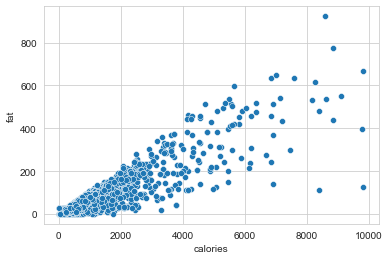

In [508]:
sns.scatterplot(data=df, x="calories", y="fat")

<AxesSubplot:xlabel='calories', ylabel='sodium'>

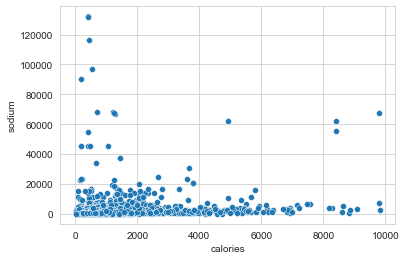

In [509]:
sns.scatterplot(data=df, x="calories", y="sodium")

<AxesSubplot:xlabel='calories', ylabel='fat'>

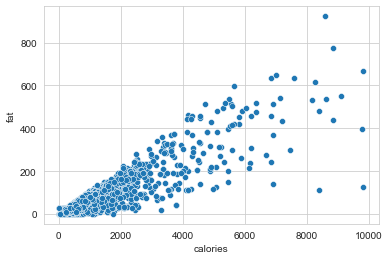

In [510]:
sns.scatterplot(data=df, x="calories", y="fat")

# Regression analysis

In [511]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "r", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

  


In [512]:
  
def abc(x,y): 
    # observations 
     
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 



Estimated coefficients:
b_0 = 121.2791309389849  
b_1 = 12.942019595105052


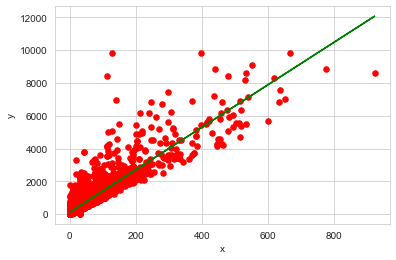

In [513]:
fat_x = df.fat.values
cal_x= df.calories.values 
abc(fat_x,cal_x)

Estimated coefficients:
b_0 = 289.1668928821647  
b_1 = 9.626764362780046


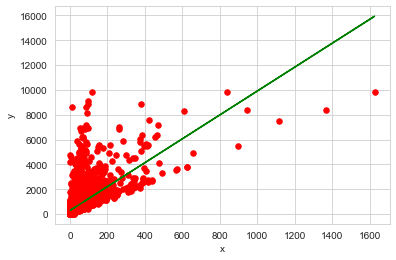

In [514]:
prot_x=df.protein.values
abc(prot_x,cal_x)

Estimated coefficients:
b_0 = 480.8310018456117  
b_1 = 0.04528518081808528


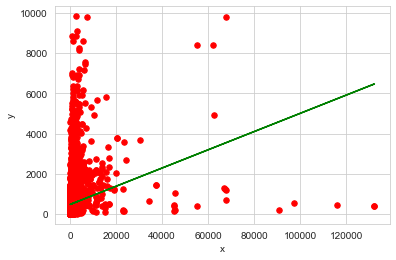

In [515]:
sod_x=df.sodium.values
abc(sod_x,cal_x)

Estimated coefficients:
b_0 = 3.7162835649916177  
b_1 = 0.00011502868582434938


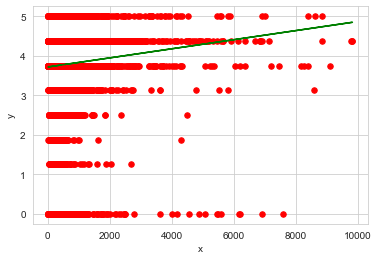

In [516]:
rat_x=df.rating.values
abc(cal_x,rat_x)

Estimated coefficients:
b_0 = 3.736334538758387  
b_1 = 0.0016708314333763127


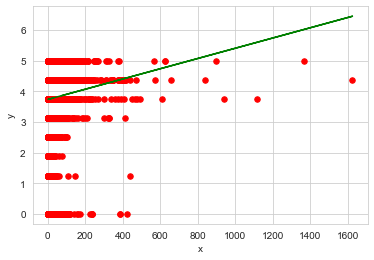

In [517]:
abc(prot_x,rat_x)

# trying to standardize rating w/ my other features

In [518]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [519]:
df_std = df[["rating","protein"]]

In [520]:
df_std.head()

,rating,protein
0,2.500,30.000000
1,4.375,18.000000
2,3.750,6.000000
3,5.000,23.446396
4,3.125,20.000000


In [521]:
std = StandardScaler()
standard = std.fit_transform(df_std[['rating','protein']])
print(standard)

[[-1.01763197  0.16835548]
 [ 0.47828783 -0.13991243]
 [-0.0203521  -0.44818035]
 ...
 [ 0.47828783  0.19404447]
 [ 0.47828783  0.55369038]
 [ 0.47828783  1.27298218]]


In [522]:
df_std=pd.DataFrame(standard)
df_std.head()

,0,1
0,-1.017632,0.168355
1,0.478288,-0.139912
2,-0.020352,-0.448180
3,0.976928,0.000000
4,-0.518992,-0.088534


In [523]:
df_std.rename({0:'rating',1:'protein'}, inplace = True, axis = 1)
df_std.head()

,rating,protein
0,-1.017632,0.168355
1,0.478288,-0.139912
2,-0.020352,-0.448180
3,0.976928,0.000000
4,-0.518992,-0.088534


In [524]:
df_std['rating']=df_std['rating'].abs()
df_std['protein']=df_std['protein'].abs()
df_std.head()

,rating,protein
0,1.017632,0.168355
1,0.478288,0.139912
2,0.020352,0.448180
3,0.976928,0.000000
4,0.518992,0.088534


In [525]:
corr_matrix = df_std.iloc[:,:].corr().abs()

In [526]:
print(corr_matrix)

           rating   protein
rating   1.000000  0.020477
protein  0.020477  1.000000


Estimated coefficients:
b_0 = 0.6570500146535945  
b_1 = -0.017344814580345244


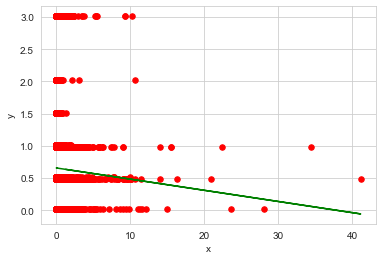

In [527]:
std_prot=df_std.protein.values
std_rat=df_std.rating.values
abc(std_prot,std_rat)

In [528]:
# conclusion: rating isn't related to calories, protein, fat and sodium in any way. 
# calories is linearly related to protein and fat and shows good correlation 
# calories will be our target variable to make predictions. 

# ML MODEL


In [529]:
df_final=df.drop(columns=["rating","sodium","title"])

In [530]:
df_final2=df.drop(columns=["rating","sodium","title"])

In [532]:
column_1 = ["calories","protein","fat"]

In [533]:
df_final.head()

,calories,protein,fat,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,almond,amaretto,anchovy,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,426.000000,30.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,403.000000,18.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,165.000000,6.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,487.900654,23.446396,30.412618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,547.000000,20.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [534]:
sc = StandardScaler()
df_final_1=sc.fit_transform(df_final.iloc[:,[0,1,2]])

In [535]:
print(df_final_1)

[[-0.16196526  0.16835548 -0.60978754]
 [-0.20387805 -0.13991243 -0.1930635 ]
 [-0.63758427 -0.44818035 -0.60978754]
 ...
 [ 0.08768916  0.19404447  0.19761529]
 [ 0.21160522  0.55369038 -0.16701825]
 [ 0.08222227  1.27298218 -0.53165178]]


In [536]:
df_final_1=pd.DataFrame(df_final_1,columns=column_1)

In [537]:
#df_final2 = df_final_1

In [538]:
df_final_1.join(df_final.iloc[:,3:])

,calories,protein,fat,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,almond,amaretto,anchovy,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,-0.161965,0.168355,-6.097875e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.203878,-0.139912,-1.930635e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.637584,-0.448180,-6.097875e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.049164,0.000000,9.253132e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.058532,-0.088534,4.134377e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,-0.887239,-0.550936,-7.400138e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18494,0.284497,-0.037156,-6.283724e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18495,0.087689,0.194044,1.976153e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18496,0.211605,0.553690,-1.670182e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [539]:
X=df_final_1.iloc[:,[1,2]]
y=df_final_1.iloc[:,0]

In [540]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [541]:
from sklearn.svm import LinearSVR

In [542]:
model = LinearSVR(C=0.1)

In [543]:
model.fit(X_train,y_train)

LinearSVR(C=0.1)

In [544]:
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)*100

In [545]:
print(score)

88.02938217289629


In [546]:
#from sklearn.model_selection import GridSearchCV

In [547]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['linear']}

In [548]:
#grid = GridSearchCV(SVR(),param_grid,refit=True,)

In [549]:
#grid.fit(X_train,y_train)

In [550]:
#grid.best_params_

In [551]:
#score = grid.score(X_test,y_test)*100

In [552]:
#print(score)

In [553]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#rmse = sqrt(mean_squared_error(y_test, y_pred))
#print(rmse)

In [554]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [555]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100

In [556]:
print(score)

84.9558421549193


In [557]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.41376516874766645


In [558]:
df.head()

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,...,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.000000,7.000000,559.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.000000,23.000000,1439.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.000000,7.000000,165.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,487.900654,23.446396,30.412618,751.8756,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.000000,32.000000,452.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Linear Regression & Regularization

In [559]:
from sklearn import preprocessing

In [560]:
df_final2=preprocessing.scale(df[['calories','protein','fat']])
df_final2=pd.DataFrame(df_final2,columns=column_1)
print(df_final2)

       calories   protein           fat
0     -0.161965  0.168355 -6.097875e-01
1     -0.203878 -0.139912 -1.930635e-01
2     -0.637584 -0.448180 -6.097875e-01
3     -0.049164  0.000000  9.253132e-17
4      0.058532 -0.088534  4.134377e-02
...         ...       ...           ...
18493 -0.887239 -0.550936 -7.400138e-01
18494  0.284497 -0.037156 -6.283724e-02
18495  0.087689  0.194044  1.976153e-01
18496  0.211605  0.553690 -1.670182e-01
18497  0.082222  1.272982 -5.316518e-01

[18498 rows x 3 columns]


In [561]:
X=df_final2.iloc[:,[1,2]]
y=df_final2.iloc[:,0]

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [563]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [564]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  -0.0010412661489722424
CO-EFFICIENT :  [0.25960715 0.76621559]


In [565]:
y_pred = linreg.predict(X_test)

In [566]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R-Square Value 0.8865770456842549


mean_absolute_error : 0.16690354323598616


mean_squared_error :  0.12907464240940236


root_mean_squared_error :  0.3592695957208213


In [567]:
score = linreg.score(X_test,y_test)*100

In [568]:
print(score)

88.65770456842549


# Ridge 

In [569]:
from sklearn.linear_model import Ridge
#alpha=0 gave better value
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

In [570]:
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R-Square Value 0.8865770456842549


mean_absolute_error : 0.16690354323598613


mean_squared_error :  0.12907464240940233


root_mean_squared_error :  0.35926959572082123


In [571]:
score = ridgereg.score(X_test,y_test)*100
print(score)

88.65770456842549


# Lasso

In [572]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[0.17583693 0.69341125]


In [573]:
y_pred = lassoreg.predict(X_test)

In [574]:
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R-Square Value 0.8554607481017849


mean_absolute_error : 0.17700753786898948


mean_squared_error :  0.16448480261719658


root_mean_squared_error :  0.40556726028760826


In [575]:
score = lassoreg.score(X_test,y_test)*100
print(score)

85.54607481017848


# making rating and calorie column nominal

In [603]:
df3=df
df3.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [598]:
for i in df3.index:
    if(df3["rating"][i]<3):
        df3["rating"][i]=0
    else:
        df3["rating"][i]=1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [599]:
df3.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",0.0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,1.0,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,1.0,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,1.0,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [600]:
corr_matrix = df3.iloc[:,1:].corr().abs()

In [601]:
c=(corr_matrix["rating"]>0.4)
    
c.value_counts()

False    678
True       1
Name: rating, dtype: int64

In [604]:
mean_rating = df['rating'].mean()

#creating new column where ratings are 1 for good and 0 for bad
df3['target'] = np.where(df['rating']>=mean_rating, 1, 0)

#printing mean value
mean_rating

3.714467384799521

In [605]:
df3.target.value_counts()

1    15907
0     4145
Name: target, dtype: int64